In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('유방암.csv', engine = 'python')
df.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 결측치 확인

In [3]:
df.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

## train/valid/test 데이터 셋 분할

In [4]:
df_y = df['diagnosis']
df_x = df.drop('diagnosis', axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size = 0.4, random_state = 1234)
df_valid_x, df_test_x, df_valid_y, df_test_y = train_test_split(df_test_x, df_test_y, train_size = 0.5, random_state = 1234)

In [5]:
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("valid data X size : {}".format(df_valid_x.shape))
print("valid data Y size : {}".format(df_valid_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
valid data X size : (171, 30)
valid data Y size : (171,)
test data X size : (171, 30)
test data Y size : (171,)


# 서포트벡터머신 SVM

## scale 변환

In [6]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [7]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, train_size = 0.4, random_state = 1234)
df_scaled_valid_x, df_scaled_test_x = train_test_split(df_scaled_test_x, train_size = 0.5, random_state = 1234)

## C : 규제에 대한 강도 변경

In [14]:
train_accuracy = []; valid_accuracy = []

para_c = [10**c for c in range(-2,2)]

for v_C in para_c:
    svm = SVC(C=v_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    valid_accuracy.append(svm.score(df_scaled_valid_x, df_valid_y))
    
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["ValidAccuracy"] = valid_accuracy
df_accuracy_c.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,C,TrainAccuracy,ValidAccuracy
0,0.01,0.621,0.667
1,0.10,0.965,0.912
2,1.00,0.996,0.936
3,10.00,0.996,0.959


C가 10인경우에 train과 valid의 차이가 가장 작으면서 valid의 정확도가 가장 높기 때문에 10으로 지정

## Gamma : 훈련 샘플이 미치는 영향의 범위를 변경 결과

In [15]:
train_accuracy = []; valid_accuracy = []

para_gamma = [10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(C=10, gamma = v_gamma, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    valid_accuracy.append(svm.score(df_scaled_valid_x, df_valid_y))
    
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["ValidAccuracy"] = valid_accuracy
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,ValidAccuracy
0,0.01,0.996,0.959
1,0.10,1.000,0.912
2,1.00,1.000,0.667
3,10.00,1.000,0.667


gamma가 0.01일 때, train과 valid의 차이가 작으면서 valid의 정확도가 가장 높기 때문에 0.01로 지정

## 최종 모델

In [16]:
svc_final = SVC(gamma = 0.01, C = 10, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)

y_pred = svc_final.predict(df_scaled_test_x)

print("Accuracy on trainnig set : {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(svc_final.score(df_scaled_test_x, df_test_y)))

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on trainnig set : 0.996
Accuracy on test set : 0.959
Confusion matrix: 
[[102   0]
 [  7  62]]


# KNN

## 이웃 수 증가에 따른 정확도 변화

In [17]:
train_accuracy = []; valid_accuracy = []

para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    valid_accuracy.append(knn.score(df_valid_x, df_valid_y))
    
    
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["ValidAccuracy"] = valid_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,ValidAccuracy
0,1,1.000,0.901
1,2,0.956,0.895
2,3,0.960,0.918
3,4,0.947,0.901
4,5,0.943,0.947
5,6,0.947,0.930
6,7,0.938,0.936
7,8,0.943,0.942
8,9,0.938,0.936
9,10,0.934,0.936


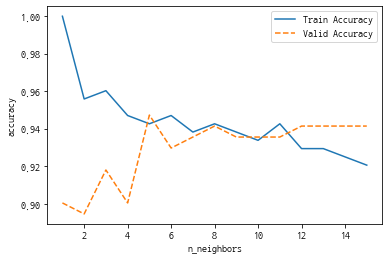

In [18]:
plt.plot(para_n_neighbors, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_n_neighbors, valid_accuracy, linestyle = '--', label = 'Valid Accuracy')
plt.ylabel("accuracy");plt.xlabel("n_neighbors")
plt.legend()

이웃 수가 5개일 때 valid 데이터의 정확도가 가장 크므로 5개로 지정

## 가중치별 이웃 수 증가에 따른 정확도 변화

In [19]:
train_accuracy = []; valid_accuracy = []

para_n_neighbors = [i for i in range(1,11)]*2

para_weights = (["uniform"])*10 +(["distance"])*10

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    valid_accuracy.append(knn.score(df_valid_x, df_valid_y))
    
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["ValidAccuracy"] = valid_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,ValidAccuracy
0,1,uniform,1.000,0.901
1,2,uniform,0.956,0.895
2,3,uniform,0.960,0.918
3,4,uniform,0.947,0.901
4,5,uniform,0.943,0.947
5,6,uniform,0.947,0.930
6,7,uniform,0.938,0.936
7,8,uniform,0.943,0.942
8,9,uniform,0.938,0.936
9,10,uniform,0.934,0.936


In [22]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors', columns = 'Weights',
                                                     values = ['TrainAccuracy','ValidAccuracy'])
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0+'_'+level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,ValidAccuracy_distance,ValidAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.900585,0.900585
2,1.0,0.955947,0.900585,0.894737
3,1.0,0.960352,0.923977,0.918129
4,1.0,0.947137,0.912281,0.900585
5,1.0,0.942731,0.935673,0.947368


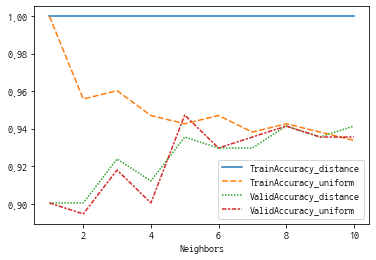

In [23]:
import seaborn as sns
sns.lineplot(data = df_accuracy_weights_pivot)

가중치 distance일때 train 데이터의 모델 정확도는 1로 과대적합되었기 때문에 가중치를 uniform으로 지정

## 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [24]:
train_accuracy = []; valid_accuracy = []

para_n_neighbors = [i for i in range(1,11)]*3

para_metric = ['minkowski']*10+['euclidean']*10 +['manhattan']*10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = 'uniform')
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    valid_accuracy.append(knn.score(df_valid_x, df_valid_y))
    
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["ValidAccuracy"] = valid_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,ValidAccuracy
0,1,minkowski,1.000,0.901
1,2,minkowski,0.956,0.895
2,3,minkowski,0.960,0.918
3,4,minkowski,0.947,0.901
4,5,minkowski,0.943,0.947
5,6,minkowski,0.947,0.930
6,7,minkowski,0.938,0.936
7,8,minkowski,0.943,0.942
8,9,minkowski,0.938,0.936
9,10,minkowski,0.934,0.936


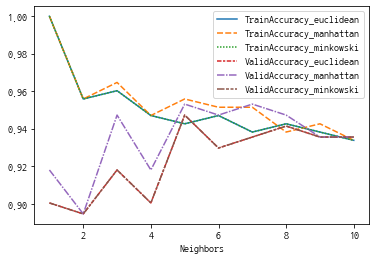

In [25]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = 'Neighbors', columns = 'Metric',
                                                     values = ['TrainAccuracy','ValidAccuracy'])
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)

df_accuracy_metric_pivot.columns = level0+'_'+level1
sns.lineplot(data = df_accuracy_metric_pivot)

거리 계산 방법이 manhattan이고 이웃의 수가 7개인 경우, train, valid의 정확도 차이가 가장 적고 valid의 값이 가장 높으므로 거리 계산 방법을 manhattan으로 지정

## 최종 모델

In [34]:
knn_model = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform', metric = 'manhattan')
knn_model.fit(df_train_x, df_train_y)

y_pred = knn_model.predict(df_test_x)

print("Accuracy on training set: {:.3f}".format(knn_model.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(knn_model.score(df_test_x, df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.952
Accuracy on test set: 0.924
Confusion matrix:
[[98  4]
 [ 9 60]]


# 신경망

## Hidden Layer 은닉층 변경

In [31]:
train_accuracy = []; valid_accuracy = []

para_hidden = [20*hidden for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    valid_accuracy.append(nn.score(df_scaled_valid_x, df_valid_y))
    
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["ValidAccuracy"] = valid_accuracy
df_accuracy_hidden.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

,HiddenLayer,TrainAccuracy,ValidAccuracy
0,20,0.996,0.965
1,40,0.996,0.971
2,60,0.996,0.965
3,80,0.996,0.971
4,100,0.996,0.971
5,120,0.996,0.971
6,140,0.996,0.965
7,160,0.996,0.965


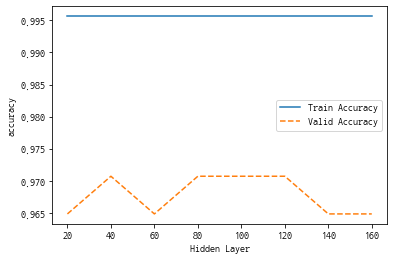

In [32]:
plt.plot(para_hidden, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_hidden, valid_accuracy, linestyle = '--', label = 'Valid Accuracy')
plt.ylabel("accuracy");plt.xlabel("Hidden Layer")
plt.legend()

은닉층의 갯수가 40일 때 처음으로 Valid 데이터의 정확도가 높기 때문에 40으로 지정

## Activation 활성화 함수 변경

In [38]:
train_accuracy = []; valid_accuracy = []

para_function = ["logistic", "tanh", "relu"]

for v_func in para_function:
    nn = MLPClassifier(hidden_layer_sizes = (40,40),
                       activation = v_func, random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    valid_accuracy.append(nn.score(df_scaled_valid_x, df_valid_y))
    
    
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["ValidAccuracy"] = valid_accuracy
df_accuracy_function.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,ActivationFunction,TrainAccuracy,ValidAccuracy
0,logistic,0.996,0.965
1,tanh,0.996,0.965
2,relu,0.996,0.971


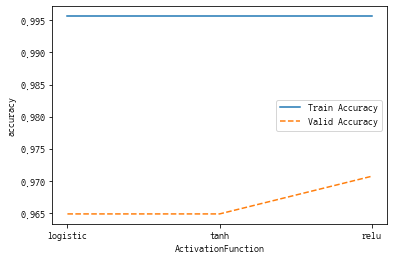

In [39]:
plt.plot(para_function, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_function, valid_accuracy, linestyle = '--', label = 'Valid Accuracy')
plt.ylabel("accuracy");plt.xlabel("ActivationFunction")
plt.legend()

활성화 함수가 relu인 경우 정확도가 가장 높기 때문에 relu선택

## Solver 가중치 최적화 변경

In [40]:
train_accuracy = []; valid_accuracy = []

para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation = "relu", hidden_layer_sizes = (40,40), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    valid_accuracy.append(nn.score(df_scaled_valid_x, df_valid_y))
    
    
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["ValidAccuracy"] = valid_accuracy
df_accuracy_solver.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Solver,TrainAccuracy,ValidAccuracy
0,lbfgs,1.000,0.953
1,sgd,0.974,0.959
2,adam,0.996,0.971


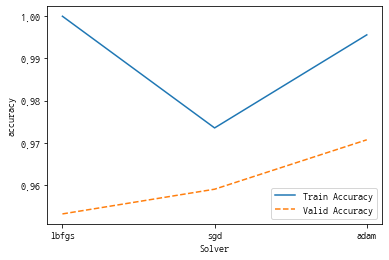

In [42]:
plt.plot(para_solver, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_solver, valid_accuracy, linestyle = '--', label = 'Valid Accuracy')
plt.ylabel("accuracy");plt.xlabel("Solver")
plt.legend()

가중치 최적화를 adam인경우 가장 정확도가 높기 때문에 adam으로 지정

## mini batch 변경 결과

In [43]:
train_accuracy = []; valid_accuracy = []

para_batch = [20*batch for batch in range(1,10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation = "relu",
                       hidden_layer_sizes = (40,40), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    valid_accuracy.append(nn.score(df_scaled_valid_x, df_valid_y))
    
    
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["ValidAccuracy"] = valid_accuracy
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,ValidAccuracy
0,20,1.000,0.971
1,40,1.000,0.965
2,60,1.000,0.965
3,80,1.000,0.965
4,100,1.000,0.965
5,120,1.000,0.965
6,140,1.000,0.965
7,160,1.000,0.965
8,180,0.996,0.965


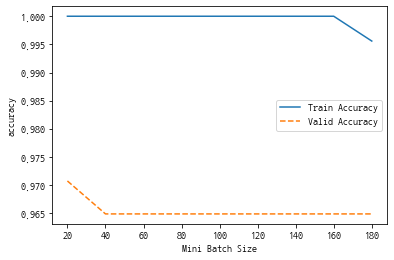

In [44]:
plt.plot(para_batch, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_batch, valid_accuracy, linestyle = '--', label = 'Valid Accuracy')
plt.ylabel("accuracy");plt.xlabel("Mini Batch Size")
plt.legend()

mini batch size가 20인 경우 valid 데이터의 정확도가 가장 크고 그 이후로는 일정하기 때문에 20으로 지정

## 최종모델

In [45]:
nn_final = MLPClassifier(batch_size = 20, solver = "adam", activation = "relu",
                       hidden_layer_sizes = (40,40), random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)

y_pred = nn_final.predict(df_scaled_test_x)

print("Accuracy on training set: {:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(nn_final.score(df_scaled_test_x, df_test_y)))

print("Confusion matrix : \n {}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 1.000
Accuracy on test set: 0.959
Confusion matrix : 
 [[101   1]
 [  6  63]]


SVM : Accuracy on test set : 0.959  
KNN : Accuracy on test set: 0.924  
신경망 : Accuracy on test set: 0.959  

SVM Confusion matrix:  
[[102   0]  
 [  7  62]]  
 세가지 모델 중 test set 정확도가 95.9%로 SVM과 신경망 모델이 같다.
하지만, 실제 유방암이지만 예측을 아니라고 한 경우인 FN이 SVM이 더 크기 때문에 인공신경망 모델이 더 나은 모델이라고 판단했다.